# Problème 3

## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

In [0]:
CA0 = 1.5 # mol/L
CB0 = 2 # mol/L
CC0 = 0 # mol/L
CD0 = 0 # mol/L
CE0 = 0 # mol/L
CF0 = 0 # mol/L
FA0 = 15 # L/min
FB0 = 20 # L/min
FC0 = 0 # L/min
FD0 = 0 # L/min
FE0 = 0 # L/min
FF0 = 0 # L/min
Vdot = 10 #L/min

## Définir les équations à résoudre

In [0]:
def equations(variables, V, Vdot):
    FA, FB, FC, FD, FE, FF = variables
    
    CA = FA/Vdot
    CB = FB/Vdot
    CC = FC/Vdot
    CD = FD/Vdot
    CE = FE/Vdot
    CF = FF/Vdot
    
    FA0 = CA0 * Vdot
    FB0 = CB0 * Vdot
    FC0 = 0
    FD0 = 0
    FE0 = 0
    FF0 = 0
    
    r1 = 0.25 * CA * CB
    r2 = 0.1 * CA * CD
    r3 = 5 * CB**2 * CC
    
    RA = -r1 - 3*r2
    RB = -2*r1 - r3
    RC = r1 + r2 - 2*r3
    RD = r1 - 2*r2 + r3
    RE = r2
    RF = r3
    
    dFAdt = RA
    dFBdt = RB
    dFCdt = RC
    dFDdt = RD
    dFEdt = RE
    dFFdt = RF
    
    return dFAdt, dFBdt, dFCdt, dFDdt, dFEdt, dFFdt

## Définir les conditions initiales

In [0]:
conditions_initiales = [FA0, FB0, FC0, FD0, FE0, FF0]

## Résoudre le problème à l'aide du solveur

In [0]:
V = np.linspace(0, 50, 51) # définir les bornes d'intégration

resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    V,
    (Vdot,)
)

## Visualiser les résultats

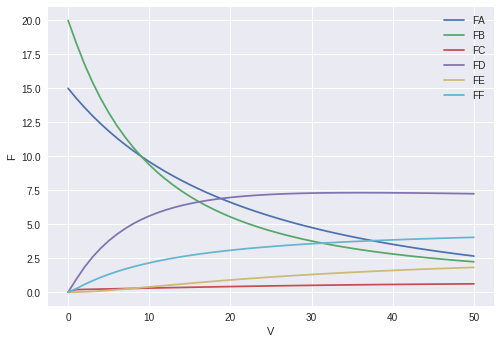

In [55]:
plt.plot(V, resultats)
plt.xlabel('V')
plt.ylabel('F')
plt.legend(['FA','FB','FC','FD','FE','FF'])
plt.show()

In [0]:
FA0 = CA0 * Vdot
FB0 = CB0 * Vdot

In [0]:
FA= resultats[:,0]

X = (FA0 - FA)/FA0


In [58]:
X[V==50]

array([0.82270658])

In [0]:
FC = resultats[:, 2]

In [60]:

FC[V==50]

array([0.6142217])

In [0]:
CC = FC/Vdot 

In [62]:
CC[V==50]

array([0.06142217])